## Data Prep

### Prepare dataset files
We need to create a txt file which contains the path to the images. These files will be used while setting up the training. 

The data is split into train and test in the ratio of 80:20. So, we will use 80% of the data for training and the rest for testing after a few iterations of training.

In [1]:
import random
import os
import subprocess
import sys

image_dir = "./kaggle_and_no-mask_dataset"
f_val = open("data_test.txt", 'w')
f_train = open("data_train.txt", 'w')

path, dirs, files = next(os.walk(image_dir))
data_size = len(files)

ind = 0
data_test_size = int(0.2 * data_size)
test_array = random.sample(range(data_size), k=data_test_size)

for f in os.listdir(image_dir):
    if(f.split(".")[-1] == "jpg"):
        ind += 1
        
        if ind in test_array:
            f_val.write(image_dir+'/'+f+'\n')
        else:
            f_train.write(image_dir+'/'+f+'\n')

f_train.close()
f_val.close()

## YOLO V3

In [10]:
!wget "https://www.dropbox.com/s/18dwbfth7prbf0h/darknet53.conv.74?dl=1" -O darknet53.conv.74

wget: /home/mark/anaconda3/lib/libuuid.so.1: no version information available (required by wget)
--2020-06-15 15:31:12--  https://www.dropbox.com/s/18dwbfth7prbf0h/darknet53.conv.74?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:601d:1::a27d:501, 162.125.5.1
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:601d:1::a27d:501|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/18dwbfth7prbf0h/darknet53.conv.74 [following]
--2020-06-15 15:31:12--  https://www.dropbox.com/s/dl/18dwbfth7prbf0h/darknet53.conv.74
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucff12a5b3100ffa5e9cc485b6ae.dl.dropboxusercontent.com/cd/0/get/A5uKvM2o0px9HtqFrhENji7tOH0EiLSN57jLJ7bDPUvFgS1c5W0fwLb8zmPBvqScpZEADECAcrcw4BKNR_BqiVn0rqZh920J5MyeqAZIuWIUwRLtl1BsbpEhICuZj21vLGs/file?dl=1# [following]
--2020-06-15 15:31:13--  https://ucff12a5b3100ffa5e9cc485b6ae.dl.dropboxuserconte

In [71]:
# !./darknet/darknet detector train yolov3-mask-no-mask-setup.data yolov3-mask-no-mask-train.cfg ./darknet53.conv.74 -map 2> train_log.txt
!./darknet/darknet detector train yolov3-mask-no-mask-setup.data yolov3-mask-no-mask-train.cfg ./backup_hold/yolov3-mask-no-mask-train_best.weights -map 2> train_log.txt

 Prepare additional network for mAP calculation...
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
yolov3-mask-no-mask-train
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 

 seen 64, trained: 166 K-images (2 Kilo-batches_64) 
Learning Rate: 1e-05, Momentum: 0.9, Decay: 0.0005
 If error occurs - run training with flag: -dont_show 
Resizing, random_coef = 1.40 

 608 x 608 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000024 seconds

 (next mAP calculation at 2700 iterations) 
 2601: 1.692687, 1.692687 avg loss, 0.000001 rate, 7.086518 seconds, 166464 images, -1.000000 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 2700 iterations) 
 2602: 1.208474, 1.644266 avg loss, 0.000001 rate, 7.015844 seconds, 166528 images, 2.753913 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 2700 iterations) 
 2603: 1.225439, 1.602383 avg loss, 0.000001 rate, 7.286755 se


 (next mAP calculation at 2700 iterations) 
 2642: 1.377856, 1.636120 avg loss, 0.000001 rate, 6.319510 seconds, 169088 images, 2.524140 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 2700 iterations) 
 2643: 1.906058, 1.663114 avg loss, 0.000001 rate, 6.324157 seconds, 169152 images, 2.522737 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 2700 iterations) 
 2644: 2.006436, 1.697446 avg loss, 0.000001 rate, 6.361603 seconds, 169216 images, 2.521348 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 2700 iterations) 
 2645: 1.117453, 1.639447 avg loss, 0.000001 rate, 6.264642 seconds, 169280 images, 2.520097 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 2700 iterations) 
 2646: 1.476847, 1.623187 avg loss, 0.000001 rate, 6.363274 seconds, 169344 images, 2.518476 hours left
Loaded: 0.000040 seconds

 (next mAP calculation at 2700 iterations) 
 2647: 2.769411, 1.737809 avg loss, 0.000001 rate, 6.695728 seconds, 169408 images, 2


 (next mAP calculation at 2700 iterations) 
 2687: 2.323963, 2.229086 avg loss, 0.000001 rate, 2.500835 seconds, 171968 images, 2.272206 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 2700 iterations) 
 2688: 1.517008, 2.157878 avg loss, 0.000001 rate, 2.457334 seconds, 172032 images, 2.258605 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 2700 iterations) 
 2689: 2.204747, 2.162565 avg loss, 0.000001 rate, 2.490492 seconds, 172096 images, 2.244975 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 2700 iterations) 
 2690: 2.815712, 2.227880 avg loss, 0.000001 rate, 2.569731 seconds, 172160 images, 2.231595 hours left
Resizing, random_coef = 1.40 

 480 x 480 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000028 seconds

 (next mAP calculation at 2700 iterations) 
 2691: 2.627229, 2.267815 avg loss, 0.000001 rate, 5.127290 seconds, 172224 images, 2.218630 hours left
Loaded: 0.000027 seconds

 (next mA

 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.258532 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 75.94 %, best = 75.94 % 
 2721: 2.493483, 1.724004 avg loss, 0.000001 rate, 3.240899 seconds, 174144 images, 2.060976 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 75.94 %, best = 75.94 % 
 2722: 3.928648, 1.944469 avg loss, 0.000001 rate, 3.335839 seconds, 174208 images, 2.052799 hours left
Loaded: 0.000020 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 75.94 %, best = 75.94 % 
 2723: 1.940246, 1.944046 avg loss, 0.000001 rate, 3.209653 seconds, 174272 images, 2.044113 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 75.94 %, best = 75.94 % 
 2724: 1.242595, 1.873901 avg loss, 0.000001 rate, 3.172248 seconds, 174336 images,

Loaded: 0.000026 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 75.94 %, best = 75.94 % 
 2756: 1.792484, 1.670642 avg loss, 0.000001 rate, 4.141391 seconds, 176384 images, 1.881936 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 75.94 %, best = 75.94 % 
 2757: 1.313042, 1.634882 avg loss, 0.000001 rate, 4.030059 seconds, 176448 images, 1.877427 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 75.94 %, best = 75.94 % 
 2758: 3.283545, 1.799749 avg loss, 0.000001 rate, 4.422236 seconds, 176512 images, 1.872568 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 75.94 %, best = 75.94 % 
 2759: 1.478412, 1.767615 avg loss, 0.000001 rate, 4.088849 seconds, 176576 images, 1.869099 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 75.94 %, 

Resizing, random_coef = 1.40 

 384 x 384 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.055916 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 75.94 %, best = 75.94 % 
 2791: 1.638046, 1.655308 avg loss, 0.000001 rate, 3.096444 seconds, 178624 images, 1.737939 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 75.94 %, best = 75.94 % 
 2792: 1.151504, 1.604928 avg loss, 0.000001 rate, 3.224216 seconds, 178688 images, 1.731146 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 75.94 %, best = 75.94 % 
 2793: 1.118948, 1.556330 avg loss, 0.000001 rate, 3.150272 seconds, 178752 images, 1.724654 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 2800 iterations) 
 Last accuracy mAP@0.5 = 75.94 %, best = 75.94 % 
 2794: 1.375116, 1.538208 avg loss, 0.000001 rate, 3.119124 seconds, 178816 images, 1.71


 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 76.16 %, best = 76.16 % 
 2821: 1.655386, 1.479043 avg loss, 0.000001 rate, 2.727230 seconds, 180544 images, 1.669113 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 76.16 %, best = 76.16 % 
 2822: 1.560681, 1.487207 avg loss, 0.000001 rate, 2.704813 seconds, 180608 images, 1.661863 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 76.16 %, best = 76.16 % 
 2823: 2.627607, 1.601247 avg loss, 0.000001 rate, 2.790549 seconds, 180672 images, 1.654096 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 76.16 %, best = 76.16 % 
 2824: 1.389889, 1.580111 avg loss, 0.000001 rate, 2.675060 seconds, 180736 images, 1.646678 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 76.16 %, best = 76.16 % 
 2825: 1.


 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 76.16 %, best = 76.16 % 
 2856: 1.179338, 1.584632 avg loss, 0.000001 rate, 6.589607 seconds, 182784 images, 1.527659 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 76.16 %, best = 76.16 % 
 2857: 1.330203, 1.559189 avg loss, 0.000001 rate, 6.645769 seconds, 182848 images, 1.533323 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 76.16 %, best = 76.16 % 
 2858: 1.670926, 1.570363 avg loss, 0.000001 rate, 6.710960 seconds, 182912 images, 1.539090 hours left
Loaded: 0.000019 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 76.16 %, best = 76.16 % 
 2859: 1.238559, 1.537182 avg loss, 0.000001 rate, 6.634629 seconds, 182976 images, 1.544988 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 76.16 %, best = 76.16 % 
 2860: 1.

 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000025 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 76.16 %, best = 76.16 % 
 2891: 2.028261, 1.599447 avg loss, 0.000001 rate, 6.450534 seconds, 185024 images, 1.481133 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 76.16 %, best = 76.16 % 
 2892: 1.520009, 1.591503 avg loss, 0.000001 rate, 6.357717 seconds, 185088 images, 1.486193 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 76.16 %, best = 76.16 % 
 2893: 1.215942, 1.553947 avg loss, 0.000001 rate, 6.127419 seconds, 185152 images, 1.490899 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 2900 iterations) 
 Last accuracy mAP@0.5 = 76.16 %, best = 76.16 % 
 2894: 1.472002, 1.545753 avg loss, 0.000001 rate, 6.413464 seconds, 185216 images, 1.494832 hours left
Loaded: 0.000026 seconds

 

Loaded: 0.000026 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 76.41 %, best = 76.41 % 
 2922: 1.267331, 1.642840 avg loss, 0.000001 rate, 6.648054 seconds, 187008 images, 1.450549 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 76.41 %, best = 76.41 % 
 2923: 0.992233, 1.577780 avg loss, 0.000001 rate, 6.551597 seconds, 187072 images, 1.455951 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 76.41 %, best = 76.41 % 
 2924: 2.770950, 1.697097 avg loss, 0.000001 rate, 7.140488 seconds, 187136 images, 1.460992 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 76.41 %, best = 76.41 % 
 2925: 1.508129, 1.678200 avg loss, 0.000001 rate, 6.687286 seconds, 187200 images, 1.467724 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 76.41 %, 

Loaded: 0.000023 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 76.41 %, best = 76.41 % 
 2957: 1.029339, 1.617076 avg loss, 0.000001 rate, 3.713979 seconds, 189248 images, 1.471523 hours left
Loaded: 0.000046 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 76.41 %, best = 76.41 % 
 2958: 1.419005, 1.597269 avg loss, 0.000001 rate, 3.743015 seconds, 189312 images, 1.467568 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 76.41 %, best = 76.41 % 
 2959: 0.962270, 1.533769 avg loss, 0.000001 rate, 3.694149 seconds, 189376 images, 1.463727 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 76.41 %, best = 76.41 % 
 2960: 1.699586, 1.550351 avg loss, 0.000001 rate, 3.880362 seconds, 189440 images, 1.459772 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA 

Loaded: 0.000027 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 76.41 %, best = 76.41 % 
 2992: 1.456522, 1.680273 avg loss, 0.000001 rate, 3.301040 seconds, 191488 images, 1.302828 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 76.41 %, best = 76.41 % 
 2993: 1.285863, 1.640832 avg loss, 0.000001 rate, 3.164505 seconds, 191552 images, 1.299042 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 76.41 %, best = 76.41 % 
 2994: 3.431295, 1.819878 avg loss, 0.000001 rate, 3.463960 seconds, 191616 images, 1.294904 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 76.41 %, best = 76.41 % 
 2995: 1.724136, 1.810304 avg loss, 0.000001 rate, 3.117646 seconds, 191680 images, 1.291635 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 3000 iterations) 
 Last accuracy mAP@0.5 = 76.41 %, 

Loaded: 0.000031 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.41 % 
 3023: 1.253909, 1.628486 avg loss, 0.000001 rate, 5.354037 seconds, 193472 images, 1.223050 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.41 % 
 3024: 1.294439, 1.595081 avg loss, 0.000001 rate, 5.339007 seconds, 193536 images, 1.225350 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.41 % 
 3025: 2.455411, 1.681114 avg loss, 0.000001 rate, 5.475234 seconds, 193600 images, 1.227571 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.41 % 
 3026: 1.439463, 1.656949 avg loss, 0.000001 rate, 5.453617 seconds, 193664 images, 1.230124 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, 


 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.41 % 
 3058: 1.142264, 1.654880 avg loss, 0.000001 rate, 3.724973 seconds, 195712 images, 1.141919 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.41 % 
 3059: 1.014578, 1.590850 avg loss, 0.000001 rate, 3.661380 seconds, 195776 images, 1.140247 hours left
Loaded: 0.000038 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.41 % 
 3060: 2.349641, 1.666729 avg loss, 0.000001 rate, 3.800914 seconds, 195840 images, 1.138415 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.171258 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.41 % 
 3061: 1.602001, 1.660256 avg loss, 0.000001 rate, 3.723453 secon

Loaded: 0.000024 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.41 % 
 3093: 1.783843, 1.733158 avg loss, 0.000001 rate, 2.349373 seconds, 197952 images, 1.162029 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.41 % 
 3094: 3.866941, 1.946536 avg loss, 0.000001 rate, 2.537879 seconds, 198016 images, 1.156328 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.41 % 
 3095: 2.386484, 1.990531 avg loss, 0.000001 rate, 2.351427 seconds, 198080 images, 1.151152 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.41 % 
 3096: 3.726818, 2.164160 avg loss, 0.000001 rate, 2.554930 seconds, 198144 images, 1.145552 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 3100 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, 


 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 76.54 %, best = 76.54 % 
 3124: 1.651819, 1.853625 avg loss, 0.000001 rate, 3.265372 seconds, 199936 images, 1.148885 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 76.54 %, best = 76.54 % 
 3125: 2.365621, 1.904825 avg loss, 0.000001 rate, 3.245944 seconds, 200000 images, 1.145342 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 76.54 %, best = 76.54 % 
 3126: 2.669747, 1.981317 avg loss, 0.000001 rate, 3.294960 seconds, 200064 images, 1.141778 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 76.54 %, best = 76.54 % 
 3127: 1.672231, 1.950409 avg loss, 0.000001 rate, 3.278716 seconds, 200128 images, 1.138360 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 76.54 %, best = 76.54 % 
 3128: 2.


 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 76.54 %, best = 76.54 % 
 3159: 1.196295, 1.719029 avg loss, 0.000001 rate, 4.022544 seconds, 202176 images, 1.037647 hours left
Loaded: 0.000021 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 76.54 %, best = 76.54 % 
 3160: 1.563026, 1.703429 avg loss, 0.000001 rate, 4.092742 seconds, 202240 images, 1.036668 hours left
Resizing, random_coef = 1.40 

 448 x 448 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.118085 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 76.54 %, best = 76.54 % 
 3161: 2.627816, 1.795867 avg loss, 0.000001 rate, 4.318933 seconds, 202304 images, 1.035851 hours left
Loaded: 0.000078 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 76.54 %, best = 76.54 % 
 3162: 1.641401, 1.780421 avg loss, 0.000001 rate, 4.143914 secon

Loaded: 0.000031 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 76.54 %, best = 76.54 % 
 3194: 1.018313, 1.518483 avg loss, 0.000001 rate, 5.180202 seconds, 204416 images, 1.065820 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 76.54 %, best = 76.54 % 
 3195: 1.417248, 1.508360 avg loss, 0.000001 rate, 5.296527 seconds, 204480 images, 1.066760 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 76.54 %, best = 76.54 % 
 3196: 0.975494, 1.455073 avg loss, 0.000001 rate, 5.317078 seconds, 204544 images, 1.067936 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 76.54 %, best = 76.54 % 
 3197: 2.348722, 1.544438 avg loss, 0.000001 rate, 5.463283 seconds, 204608 images, 1.069131 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 76.54 %, 


 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.54 % 
 3225: 1.429407, 1.681935 avg loss, 0.000001 rate, 3.257900 seconds, 206400 images, 1.027246 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.54 % 
 3226: 1.601897, 1.673931 avg loss, 0.000001 rate, 3.197959 seconds, 206464 images, 1.023987 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.54 % 
 3227: 3.002939, 1.806832 avg loss, 0.000001 rate, 3.290567 seconds, 206528 images, 1.020623 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.54 % 
 3228: 1.605179, 1.786667 avg loss, 0.000001 rate, 3.234887 seconds, 206592 images, 1.017482 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.54 % 
 3229: 1.


 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.54 % 
 3260: 2.597162, 1.700100 avg loss, 0.000001 rate, 3.267739 seconds, 208640 images, 0.924618 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000028 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.54 % 
 3261: 1.588381, 1.688928 avg loss, 0.000001 rate, 3.684430 seconds, 208704 images, 0.922089 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.54 % 
 3262: 2.283510, 1.748386 avg loss, 0.000001 rate, 3.923743 seconds, 208768 images, 0.920431 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.54 % 
 3263: 2.426857, 1.816233 avg loss, 0.000001 rate, 3.829529 seconds, 208832 images, 0.919271 hours left
Loaded: 0

Loaded: 0.000028 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.54 % 
 3295: 1.261282, 1.517291 avg loss, 0.000001 rate, 4.783447 seconds, 210880 images, 0.935088 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.54 % 
 3296: 2.327535, 1.598316 avg loss, 0.000001 rate, 4.973871 seconds, 210944 images, 0.935105 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.54 % 
 3297: 1.696703, 1.608155 avg loss, 0.000001 rate, 4.895886 seconds, 211008 images, 0.935480 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, best = 76.54 % 
 3298: 1.670292, 1.614368 avg loss, 0.000001 rate, 4.849290 seconds, 211072 images, 0.935686 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 76.25 %, 


 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 76.35 %, best = 76.54 % 
 3326: 1.560189, 1.555217 avg loss, 0.000001 rate, 4.092384 seconds, 212864 images, 0.901257 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 76.35 %, best = 76.54 % 
 3327: 1.305170, 1.530212 avg loss, 0.000001 rate, 4.022011 seconds, 212928 images, 0.899906 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 76.35 %, best = 76.54 % 
 3328: 1.904105, 1.567601 avg loss, 0.000001 rate, 4.211340 seconds, 212992 images, 0.898426 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 76.35 %, best = 76.54 % 
 3329: 1.779806, 1.588822 avg loss, 0.000001 rate, 4.206751 seconds, 213056 images, 0.897303 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 76.35 %, best = 76.54 % 
 3330: 1.

Resizing, random_coef = 1.40 

 480 x 480 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000025 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 76.35 %, best = 76.54 % 
 3361: 1.167570, 1.865786 avg loss, 0.000001 rate, 4.717336 seconds, 215104 images, 0.853007 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 76.35 %, best = 76.54 % 
 3362: 2.858909, 1.965099 avg loss, 0.000001 rate, 5.141582 seconds, 215168 images, 0.852851 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 76.35 %, best = 76.54 % 
 3363: 1.479707, 1.916560 avg loss, 0.000001 rate, 4.865415 seconds, 215232 images, 0.853434 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 76.35 %, best = 76.54 % 
 3364: 1.336357, 1.858539 avg loss, 0.000001 rate, 4.903058 seconds, 215296 images, 0.85


 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 76.35 %, best = 76.54 % 
 3395: 1.514615, 1.777494 avg loss, 0.000001 rate, 5.429245 seconds, 217280 images, 0.818647 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 76.35 %, best = 76.54 % 
 3396: 1.581815, 1.757926 avg loss, 0.000001 rate, 5.461894 seconds, 217344 images, 0.819585 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 76.35 %, best = 76.54 % 
 3397: 1.381088, 1.720243 avg loss, 0.000001 rate, 5.360288 seconds, 217408 images, 0.820553 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 76.35 %, best = 76.54 % 
 3398: 1.243121, 1.672531 avg loss, 0.000001 rate, 5.361384 seconds, 217472 images, 0.821326 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 3400 iterations) 
 Last accuracy mAP@0.5 = 76.35 %, best = 76.54 % 
 3399: 1.

Loaded: 0.000026 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 76.18 %, best = 76.54 % 
 3426: 1.728172, 1.672372 avg loss, 0.000001 rate, 3.012977 seconds, 219264 images, 0.815487 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 76.18 %, best = 76.54 % 
 3427: 2.117061, 1.716841 avg loss, 0.000001 rate, 3.230440 seconds, 219328 images, 0.812136 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 76.18 %, best = 76.54 % 
 3428: 1.177643, 1.662922 avg loss, 0.000001 rate, 3.022027 seconds, 219392 images, 0.809157 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 76.18 %, best = 76.54 % 
 3429: 3.044891, 1.801118 avg loss, 0.000001 rate, 3.269554 seconds, 219456 images, 0.805867 hours left
Loaded: 0.000022 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 76.18 %, 

Resizing, random_coef = 1.40 

 512 x 512 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000059 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 76.18 %, best = 76.54 % 
 3461: 1.465018, 1.971369 avg loss, 0.000001 rate, 5.131064 seconds, 221504 images, 0.726784 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 76.18 %, best = 76.54 % 
 3462: 1.714229, 1.945655 avg loss, 0.000001 rate, 5.158073 seconds, 221568 images, 0.727199 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 76.18 %, best = 76.54 % 
 3463: 1.408846, 1.891974 avg loss, 0.000001 rate, 4.999823 seconds, 221632 images, 0.727635 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 76.18 %, best = 76.54 % 
 3464: 1.320845, 1.834861 avg loss, 0.000001 rate, 4.937176 seconds, 221696 images, 0.72

Loaded: 0.000026 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 76.18 %, best = 76.54 % 
 3496: 1.647217, 1.794598 avg loss, 0.000001 rate, 3.507927 seconds, 223744 images, 0.657622 hours left
Loaded: 0.000029 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 76.18 %, best = 76.54 % 
 3497: 1.726961, 1.787834 avg loss, 0.000001 rate, 3.526405 seconds, 223808 images, 0.655957 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 76.18 %, best = 76.54 % 
 3498: 1.705608, 1.779612 avg loss, 0.000001 rate, 3.456321 seconds, 223872 images, 0.654325 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 76.18 %, best = 76.54 % 
 3499: 2.018654, 1.803516 avg loss, 0.000001 rate, 3.501159 seconds, 223936 images, 0.652601 hours left
Loaded: 0.000021 seconds

 (next mAP calculation at 3500 iterations) 
 Last accuracy mAP@0.5 = 76.18 %, 

Loaded: 0.000028 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 76.19 %, best = 76.54 % 
 3527: 1.149664, 1.556119 avg loss, 0.000001 rate, 4.333583 seconds, 225728 images, 0.622070 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 76.19 %, best = 76.54 % 
 3528: 2.769624, 1.677469 avg loss, 0.000001 rate, 4.557449 seconds, 225792 images, 0.621543 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 76.19 %, best = 76.54 % 
 3529: 2.827479, 1.792470 avg loss, 0.000001 rate, 4.693867 seconds, 225856 images, 0.621303 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 76.19 %, best = 76.54 % 
 3530: 1.180562, 1.731279 avg loss, 0.000001 rate, 4.457681 seconds, 225920 images, 0.621231 hours left
Resizing, random_coef = 1.40 

 352 x 352 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA 

Loaded: 0.000026 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 76.19 %, best = 76.54 % 
 3562: 1.332126, 1.734908 avg loss, 0.000001 rate, 4.986093 seconds, 227968 images, 0.640744 hours left
Loaded: 0.000030 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 76.19 %, best = 76.54 % 
 3563: 1.570045, 1.718422 avg loss, 0.000001 rate, 5.084673 seconds, 228032 images, 0.640403 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 76.19 %, best = 76.54 % 
 3564: 1.699451, 1.716524 avg loss, 0.000001 rate, 5.132575 seconds, 228096 images, 0.640172 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 76.19 %, best = 76.54 % 
 3565: 1.503942, 1.695266 avg loss, 0.000001 rate, 5.096746 seconds, 228160 images, 0.639986 hours left
Loaded: 0.000023 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 76.19 %, 

Loaded: 0.000023 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 76.19 %, best = 76.54 % 
 3597: 2.071642, 1.780910 avg loss, 0.000001 rate, 6.490628 seconds, 230208 images, 0.587160 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 76.19 %, best = 76.54 % 
 3598: 1.579825, 1.760802 avg loss, 0.000001 rate, 6.501287 seconds, 230272 images, 0.588555 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 76.19 %, best = 76.54 % 
 3599: 1.342795, 1.719001 avg loss, 0.000001 rate, 6.510387 seconds, 230336 images, 0.589929 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3600 iterations) 
 Last accuracy mAP@0.5 = 76.19 %, best = 76.54 % 
 3600: 2.642951, 1.811396 avg loss, 0.000001 rate, 6.683994 seconds, 230400 images, 0.591281 hours left
Resizing to initial size: 416 x 416  try to allocate additional workspace_size = 52.43 MB 
 CUDA allocat


 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 76.75 %, best = 76.75 % 
 3628: 1.361030, 1.554754 avg loss, 0.000001 rate, 5.865307 seconds, 232192 images, 0.599680 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 76.75 %, best = 76.75 % 
 3629: 1.559587, 1.555238 avg loss, 0.000001 rate, 5.931536 seconds, 232256 images, 0.599744 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 76.75 %, best = 76.75 % 
 3630: 1.562518, 1.555966 avg loss, 0.000001 rate, 5.888230 seconds, 232320 images, 0.599860 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.127753 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 76.75 %, best = 76.75 % 
 3631: 1.226145, 1.522984 avg loss, 0.000001 rate, 3.429323 secon


 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 76.75 %, best = 76.75 % 
 3663: 1.358992, 1.634407 avg loss, 0.000001 rate, 6.399229 seconds, 234432 images, 0.561168 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 76.75 %, best = 76.75 % 
 3664: 1.183533, 1.589320 avg loss, 0.000001 rate, 6.397087 seconds, 234496 images, 0.561547 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 76.75 %, best = 76.75 % 
 3665: 2.396872, 1.670075 avg loss, 0.000001 rate, 6.632385 seconds, 234560 images, 0.561902 hours left
Loaded: 0.000028 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 76.75 %, best = 76.75 % 
 3666: 3.675238, 1.870591 avg loss, 0.000001 rate, 6.811709 seconds, 234624 images, 0.562455 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 76.75 %, best = 76.75 % 
 3667: 3.


 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 76.75 %, best = 76.75 % 
 3698: 1.107006, 1.674361 avg loss, 0.000001 rate, 2.987641 seconds, 236672 images, 0.497131 hours left
Loaded: 0.000041 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 76.75 %, best = 76.75 % 
 3699: 2.208909, 1.727816 avg loss, 0.000001 rate, 3.072156 seconds, 236736 images, 0.494666 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3700 iterations) 
 Last accuracy mAP@0.5 = 76.75 %, best = 76.75 % 
 3700: 1.701380, 1.725173 avg loss, 0.000001 rate, 3.054499 seconds, 236800 images, 0.492288 hours left
Resizing to initial size: 416 x 416  try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 

 calculation mAP (mean average precision)...

 detections_count = 7844, unique_truth_count = 1559  
class_id = 0, name = mask, ap = 88.19%   	 (TP = 545, FP = 100) 
class_id = 1, name = no_mask, ap = 64.60%   	 (TP = 535, FP = 146) 

 for 


 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 76.40 %, best = 76.75 % 
 3730: 1.396889, 1.514442 avg loss, 0.000001 rate, 4.949067 seconds, 238720 images, 0.472390 hours left
Resizing, random_coef = 1.40 

 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.154091 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 76.40 %, best = 76.75 % 
 3731: 1.631793, 1.526177 avg loss, 0.000001 rate, 3.465490 seconds, 238784 images, 0.471378 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 76.40 %, best = 76.75 % 
 3732: 1.355804, 1.509140 avg loss, 0.000001 rate, 3.502657 seconds, 238848 images, 0.469369 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 76.40 %, best = 76.75 % 
 3733: 1.947772, 1.553003 avg loss, 0.000001 rate, 3.545540 secon

Loaded: 0.000033 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 76.40 %, best = 76.75 % 
 3764: 1.432206, 1.748881 avg loss, 0.000001 rate, 2.670436 seconds, 240896 images, 0.410525 hours left
Loaded: 0.000045 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 76.40 %, best = 76.75 % 
 3765: 1.133236, 1.687317 avg loss, 0.000001 rate, 2.597524 seconds, 240960 images, 0.408171 hours left
Loaded: 0.000033 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 76.40 %, best = 76.75 % 
 3766: 1.477357, 1.666321 avg loss, 0.000001 rate, 2.525471 seconds, 241024 images, 0.405785 hours left
Loaded: 0.000032 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 76.40 %, best = 76.75 % 
 3767: 1.236631, 1.623352 avg loss, 0.000001 rate, 2.622898 seconds, 241088 images, 0.403368 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 76.40 %, 

Loaded: 0.000027 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 76.40 %, best = 76.75 % 
 3799: 1.737411, 1.784324 avg loss, 0.000001 rate, 3.044432 seconds, 243136 images, 0.347420 hours left
Loaded: 0.000050 seconds

 (next mAP calculation at 3800 iterations) 
 Last accuracy mAP@0.5 = 76.40 %, best = 76.75 % 
 3800: 2.278926, 1.833784 avg loss, 0.000001 rate, 3.252688 seconds, 243200 images, 0.345646 hours left
Resizing to initial size: 416 x 416  try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 

 calculation mAP (mean average precision)...

 detections_count = 8385, unique_truth_count = 1559  
class_id = 0, name = mask, ap = 88.35%   	 (TP = 547, FP = 106) 
class_id = 1, name = no_mask, ap = 64.33%   	 (TP = 539, FP = 160) 

 for conf_thresh = 0.25, precision = 0.80, recall = 0.70, F1-score = 0.75 
 for conf_thresh = 0.25, TP = 1086, FP = 266, FN = 473, average IoU = 58.02 % 

 IoU threshold = 50 %, used Area-Under-Curve for 

Loaded: 0.000027 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 76.34 %, best = 76.75 % 
 3830: 1.785624, 1.804224 avg loss, 0.000001 rate, 2.277871 seconds, 245120 images, 0.305298 hours left
Resizing, random_coef = 1.40 

 512 x 512 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.000024 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 76.34 %, best = 76.75 % 
 3831: 1.730151, 1.796817 avg loss, 0.000001 rate, 4.998675 seconds, 245184 images, 0.303321 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 76.34 %, best = 76.75 % 
 3832: 2.109680, 1.828103 avg loss, 0.000001 rate, 5.130136 seconds, 245248 images, 0.302634 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 76.34 %, best = 76.75 % 
 3833: 1.474102, 1.792703 avg loss, 0.000001 rate, 4.952861 seconds, 245312 images, 0.30


 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 76.34 %, best = 76.75 % 
 3865: 1.020775, 1.805304 avg loss, 0.000001 rate, 5.838827 seconds, 247360 images, 0.265897 hours left
Loaded: 0.000046 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 76.34 %, best = 76.75 % 
 3866: 2.978601, 1.922634 avg loss, 0.000001 rate, 6.280335 seconds, 247424 images, 0.265428 hours left
Loaded: 0.000025 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 76.34 %, best = 76.75 % 
 3867: 1.419361, 1.872307 avg loss, 0.000001 rate, 5.833263 seconds, 247488 images, 0.265111 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 76.34 %, best = 76.75 % 
 3868: 1.528063, 1.837882 avg loss, 0.000001 rate, 5.962933 seconds, 247552 images, 0.264615 hours left
Loaded: 0.000040 seconds

 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 76.34 %, best = 76.75 % 
 3869: 1.


 (next mAP calculation at 3900 iterations) 
 Last accuracy mAP@0.5 = 76.34 %, best = 76.75 % 
 3900: 1.265912, 2.059710 avg loss, 0.000001 rate, 2.566212 seconds, 249600 images, 0.230276 hours left
Resizing to initial size: 416 x 416  try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 

 calculation mAP (mean average precision)...

 detections_count = 8361, unique_truth_count = 1559  
class_id = 0, name = mask, ap = 88.03%   	 (TP = 542, FP = 106) 
class_id = 1, name = no_mask, ap = 63.77%   	 (TP = 535, FP = 161) 

 for conf_thresh = 0.25, precision = 0.80, recall = 0.69, F1-score = 0.74 
 for conf_thresh = 0.25, TP = 1077, FP = 267, FN = 482, average IoU = 57.86 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.759009, or 75.90 % 

Set -points flag:
 `-points 101` for MS COCO 
 `-points 11` for PascalVOC 2007 (uncomment `difficult` in voc.data) 
 `-points 0` (AUC) for ImageNet, PascalVOC 2010-2012,

 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.234799 seconds - performance bottleneck on CPU or Disk HDD/SSD

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 75.90 %, best = 76.75 % 
 3931: 1.404637, 1.560821 avg loss, 0.000001 rate, 6.969540 seconds, 251584 images, 0.203363 hours left
Loaded: 0.000027 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 75.90 %, best = 76.75 % 
 3932: 1.283183, 1.533057 avg loss, 0.000001 rate, 6.907301 seconds, 251648 images, 0.202711 hours left
Loaded: 0.000021 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 75.90 %, best = 76.75 % 
 3933: 1.253650, 1.505117 avg loss, 0.000001 rate, 6.948214 seconds, 251712 images, 0.201988 hours left
Loaded: 0.000024 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 75.90 %, best = 76.75 % 
 3934: 1.592061, 1.513811 avg loss, 0.000001 rate, 7.241663 seconds, 251776 images,

Loaded: 0.000033 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 75.90 %, best = 76.75 % 
 3966: 1.250081, 1.560660 avg loss, 0.000001 rate, 6.894846 seconds, 253824 images, 0.172819 hours left
Loaded: 0.000036 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 75.90 %, best = 76.75 % 
 3967: 1.197171, 1.524311 avg loss, 0.000001 rate, 6.926218 seconds, 253888 images, 0.171742 hours left
Loaded: 0.000031 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 75.90 %, best = 76.75 % 
 3968: 3.178515, 1.689731 avg loss, 0.000001 rate, 7.356617 seconds, 253952 images, 0.170659 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 75.90 %, best = 76.75 % 
 3969: 1.329175, 1.653676 avg loss, 0.000001 rate, 7.002761 seconds, 254016 images, 0.169607 hours left
Loaded: 0.000026 seconds

 (next mAP calculation at 4000 iterations) 
 Last accuracy mAP@0.5 = 75.90 %, 

Resizing to initial size: 416 x 416  try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 

 calculation mAP (mean average precision)...

 detections_count = 6942, unique_truth_count = 1559  
class_id = 0, name = mask, ap = 87.41%   	 (TP = 533, FP = 103) 
class_id = 1, name = no_mask, ap = 64.71%   	 (TP = 529, FP = 138) 

 for conf_thresh = 0.25, precision = 0.82, recall = 0.68, F1-score = 0.74 
 for conf_thresh = 0.25, TP = 1062, FP = 241, FN = 497, average IoU = 58.86 % 

 IoU threshold = 50 %, used Area-Under-Curve for each unique Recall 
 mean average precision (mAP@0.50) = 0.760588, or 76.06 % 

Set -points flag:
 `-points 101` for MS COCO 
 `-points 11` for PascalVOC 2007 (uncomment `difficult` in voc.data) 
 `-points 0` (AUC) for ImageNet, PascalVOC 2010-2012, your custom dataset

 mean_average_precision (mAP@0.5) = 0.760588 


## Test network

In [12]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display_output(imagePath):
    src = cv2.imread(imagePath,1)
    output = cv2.imread("predictions.jpg")

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 166 K-images (2 Kilo-batches_64) 
test-image1.jpg: Predicted in 18.034000 milli-seconds.
mask: 99%


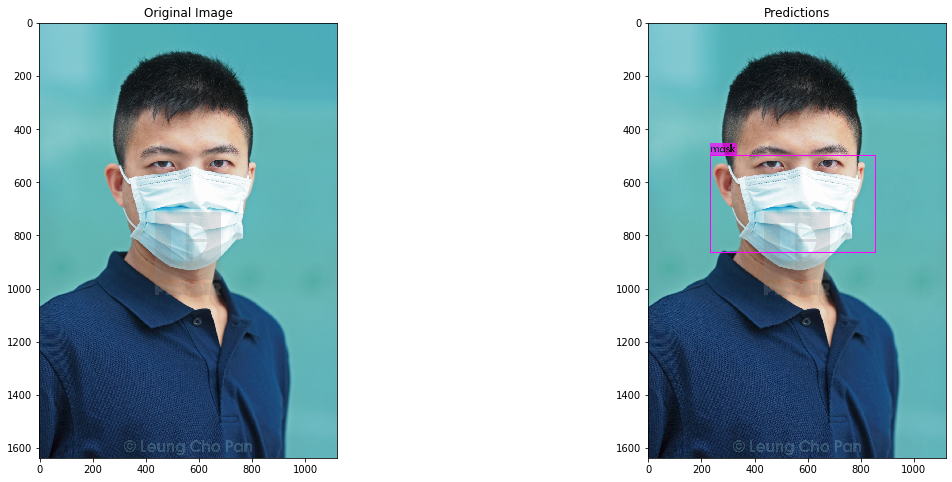

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 166 K-images (2 Kilo-batches_64) 
test-image2.jpg: Predicted in 18.122000 milli-seconds.
mask: 97%
mask: 99%
no_mask: 100%
mask: 71%


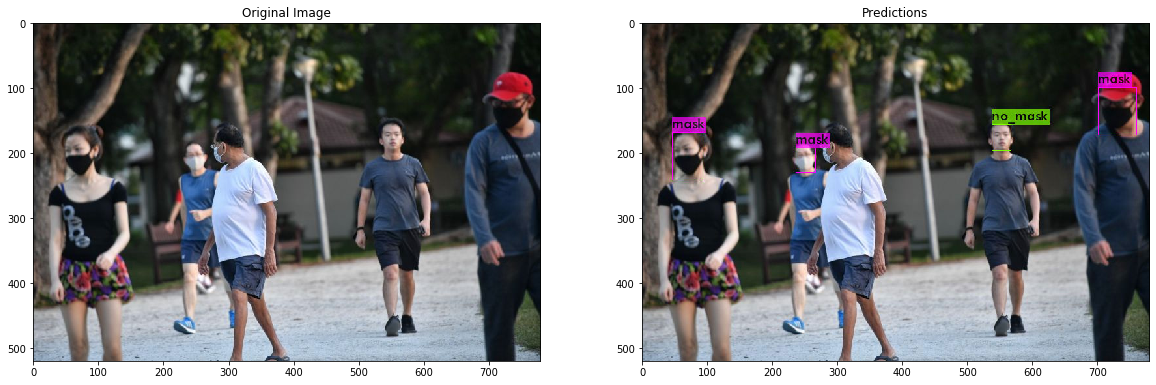

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 166 K-images (2 Kilo-batches_64) 
test-image3.jpg: Predicted in 18.061000 milli-seconds.
mask: 99%
mask: 86%
mask: 99%
no_mask: 91%
mask: 100%
mask: 90%
mask: 98%
mask: 97%
mask: 82%
mask: 99%
mask: 69%
mask: 85%
mask: 100%
mask: 94%
mask: 99%
mask: 99%
mask: 95%
mask: 99%
mask: 97%


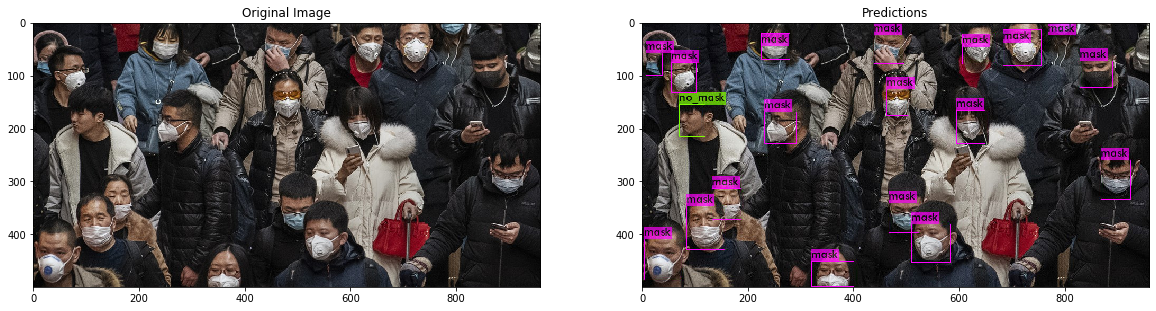

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 166 K-images (2 Kilo-batches_64) 
test-image4.jpg: Predicted in 17.957000 milli-seconds.
no_mask: 97%
no_mask: 76%
mask: 99%
mask: 98%
mask: 98%
no_mask: 62%
mask: 99%


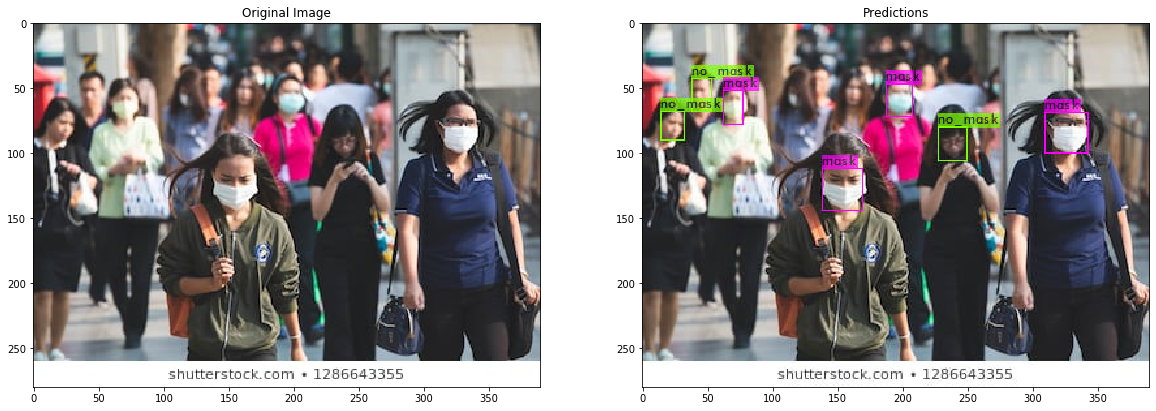

In [108]:
!./darknet/darknet detector test yolov3-mask-no-mask-setup.data yolov3-mask-no-mask-test.cfg ./backup/yolov3-mask-no-mask-train_best.weights test-image1.jpg -dont_show -thresh .6 2> /dev/null
display_output("test-image1.jpg")
!mv predictions.jpg v3-test-image1.jpg

!./darknet/darknet detector test yolov3-mask-no-mask-setup.data yolov3-mask-no-mask-test.cfg ./backup/yolov3-mask-no-mask-train_best.weights test-image2.jpg -dont_show -thresh .6 2> /dev/null
display_output("test-image2.jpg")
!mv predictions.jpg v3-test-image2.jpg

!./darknet/darknet detector test yolov3-mask-no-mask-setup.data yolov3-mask-no-mask-test.cfg ./backup/yolov3-mask-no-mask-train_best.weights test-image3.jpg -dont_show -thresh .6 2> /dev/null
display_output("test-image3.jpg")
!mv predictions.jpg v3-test-image3.jpg

!./darknet/darknet detector test yolov3-mask-no-mask-setup.data yolov3-mask-no-mask-test.cfg ./backup/yolov3-mask-no-mask-train_best.weights test-image4.jpg -dont_show -thresh .6 2> /dev/null
display_output("test-image4.jpg")
!mv predictions.jpg v3-test-image4.jpg


## Process videos

In [86]:
!./darknet/darknet detector demo yolov3-mask-no-mask-setup.data yolov3-mask-no-mask-test.cfg ./backup/yolov3-mask-no-mask-train_best.weights test-video1.mp4 -thresh .6 -out_filename v3-out-vid1.avi -dont_show

 CUDA-version: 10020 (10020), cuDNN: 7.6.5, GPU count: 2  
 OpenCV version: 4.2.0
Demo
 0 : compute_capability = 610, cudnn_half = 0, GPU: TITAN X (Pascal) 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 

Done! Loaded 107 layers from weights-file 
video file: test-video1.mp4
Video stream: 1600 x 842 
Objects:


FPS:0.0 	 AVG_FPS:0.0
Objects:

no_mask: 98% 
no_mask: 98% 
no_mask: 97% 
no_mask: 91% 
no_mask: 88% 

FPS:5.1 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 98% 
no_mask: 97% 
no_mask: 91% 
no_mask: 87% 
mask: 62% 

FPS:9.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 97% 
no_mask: 96% 
no_mask: 90% 
no_mask: 86% 
mask: 69% 

FPS:13.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 97% 
no_mask: 96% 
no_mask: 89% 
no_mask: 87% 
mask: 69% 

FPS:17.2 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 97% 
no_mask: 96% 
no_mask: 88% 
no_mask: 85% 
mask: 69% 

FPS:20.7 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 97% 
no_mask: 95% 
no_mask: 87% 
no_mask: 86% 
mask: 70% 

FPS:24.1 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 97% 
no_mask: 96% 
no_mask: 87% 
no_mask: 86% 
mask: 62% 

FPS:2

Objects:

no_mask: 91% 
mask: 99% 
mask: 96% 
mask: 94% 
mask: 90% 
mask: 86% 

FPS:57.4 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 91% 
mask: 99% 
mask: 96% 
mask: 94% 
mask: 91% 
mask: 85% 

FPS:57.6 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 91% 
mask: 99% 
mask: 95% 
mask: 94% 
mask: 91% 
mask: 86% 

FPS:57.7 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 91% 
mask: 99% 
mask: 94% 
mask: 94% 
mask: 91% 
mask: 82% 

FPS:57.6 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 93% 
mask: 99% 
mask: 94% 
mask: 94% 
mask: 89% 
mask: 87% 

FPS:57.6 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 92% 
mask: 100% 
mask: 97% 
mask: 94% 
mask: 89% 
mask: 85% 

FPS:57.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 91% 
mask: 100% 
mask: 97% 
mask: 94% 
mask: 90% 
mask: 86% 

FPS:57.1 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 91% 
mask: 100% 
mask: 97% 
mask: 94% 
mask: 89% 
mask: 83% 

FPS:57.2 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 92% 
mask: 100% 
mask: 97%

Objects:

no_mask: 93% 
mask: 99% 
mask: 98% 
mask: 96% 
mask: 87% 
mask: 84% 

FPS:55.7 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 94% 
mask: 99% 
mask: 98% 
mask: 97% 
mask: 83% 
mask: 81% 

FPS:55.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 95% 
mask: 99% 
mask: 98% 
mask: 97% 
mask: 79% 
mask: 77% 
mask: 63% 

FPS:55.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 95% 
mask: 99% 
mask: 98% 
mask: 97% 
mask: 78% 
mask: 77% 
mask: 63% 

FPS:55.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 96% 
mask: 99% 
mask: 98% 
mask: 97% 
mask: 81% 
mask: 78% 
mask: 70% 

FPS:54.4 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 95% 
mask: 99% 
mask: 98% 
mask: 97% 
mask: 80% 
mask: 79% 

FPS:54.6 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 95% 
mask: 100% 
mask: 99% 
mask: 97% 
mask: 82% 
mask: 82% 

FPS:54.7 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 94% 
mask: 100% 
mask: 99% 
mask: 96% 
mask: 83% 
mask: 83% 

FPS:54.8 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_


 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 94% 
mask: 98% 
mask: 97% 
mask: 86% 
mask: 82% 

FPS:57.2 	 AVG_FPS:55.8

 cvWriteFrame 
Objects:

no_mask: 97% 
no_mask: 94% 
mask: 98% 
mask: 98% 
mask: 84% 
mask: 83% 

FPS:57.5 	 AVG_FPS:55.8

 cvWriteFrame 
Objects:

no_mask: 96% 
no_mask: 94% 
mask: 98% 
mask: 98% 
mask: 85% 
mask: 83% 

FPS:57.4 	 AVG_FPS:55.8

 cvWriteFrame 
Objects:

no_mask: 97% 
no_mask: 93% 
mask: 98% 
mask: 97% 
mask: 87% 
mask: 84% 

FPS:57.2 	 AVG_FPS:55.8

 cvWriteFrame 
Objects:

no_mask: 97% 
no_mask: 94% 
mask: 98% 
mask: 98% 
mask: 86% 
mask: 86% 

FPS:56.9 	 AVG_FPS:55.8

 cvWriteFrame 
Objects:

no_mask: 96% 
no_mask: 94% 
mask: 98% 
mask: 97% 
mask: 86% 
mask: 85% 

FPS:57.0 	 AVG_FPS:55.8

 cvWriteFrame 
Objects:

no_mask: 96% 
no_mask: 95% 
mask: 98% 
mask: 97% 
mask: 85% 
mask: 84% 

FPS:57.3 	 AVG_FPS:55.8

 cvWriteFrame 
Objects:

no_mask: 96% 
no_mask: 93% 
mask: 98% 
mask: 97% 
mask: 87% 
mask: 87% 

FPS:57.5 	 AVG_FPS:55.8

 cvWriteFrame 



 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 94% 
mask: 99% 
mask: 98% 
mask: 81% 
mask: 78% 

FPS:57.3 	 AVG_FPS:55.8

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 94% 
mask: 99% 
mask: 98% 
mask: 80% 
mask: 76% 

FPS:57.4 	 AVG_FPS:55.8

 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 94% 
mask: 99% 
mask: 98% 
mask: 74% 
mask: 71% 

FPS:56.7 	 AVG_FPS:55.8

 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 95% 
mask: 99% 
mask: 98% 
mask: 72% 
mask: 72% 

FPS:56.9 	 AVG_FPS:55.8

 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 95% 
mask: 99% 
mask: 98% 
mask: 74% 
mask: 72% 

FPS:57.1 	 AVG_FPS:55.8

 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 95% 
mask: 99% 
mask: 98% 
mask: 75% 
mask: 72% 
mask: 68% 

FPS:56.2 	 AVG_FPS:55.8

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 95% 
mask: 99% 
mask: 98% 
mask: 76% 
mask: 73% 
mask: 67% 

FPS:56.3 	 AVG_FPS:55.8

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 96% 
mask: 99% 
mask: 98% 
mask: 74% 
mask: 74% 

FPS:56.5 	 AVG_FPS

Objects:

no_mask: 95% 
mask: 100% 
mask: 99% 
mask: 98% 
mask: 74% 
mask: 69% 

FPS:56.5 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 95% 
mask: 100% 
mask: 99% 
mask: 98% 
mask: 71% 
mask: 69% 
mask: 68% 

FPS:56.0 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 95% 
mask: 100% 
mask: 99% 
mask: 98% 
mask: 72% 
mask: 71% 
mask: 69% 

FPS:55.5 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 94% 
mask: 100% 
mask: 98% 
mask: 98% 
mask: 77% 
mask: 73% 

FPS:55.2 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 94% 
mask: 100% 
mask: 98% 
mask: 98% 
mask: 78% 
mask: 77% 

FPS:54.8 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 95% 
mask: 100% 
mask: 98% 
mask: 98% 
mask: 80% 
mask: 73% 

FPS:53.9 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 95% 
mask: 100% 
mask: 99% 
mask: 98% 
mask: 81% 
mask: 74% 

FPS:53.2 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 95% 
mask: 100% 
mask: 99% 
mask: 98% 
mask: 79% 
mask: 77% 

FPS:53.1 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:



mask: 99% 
mask: 98% 
mask: 98% 
mask: 75% 

FPS:58.2 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 95% 
mask: 99% 
mask: 98% 
mask: 98% 
mask: 80% 

FPS:57.7 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 95% 
mask: 99% 
mask: 99% 
mask: 98% 
mask: 84% 

FPS:57.4 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 94% 
mask: 99% 
mask: 99% 
mask: 98% 
mask: 84% 

FPS:57.5 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 94% 
mask: 99% 
mask: 99% 
mask: 98% 
mask: 85% 

FPS:57.7 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 95% 
mask: 99% 
mask: 99% 
mask: 98% 
mask: 87% 

FPS:58.1 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 95% 
mask: 99% 
mask: 98% 
mask: 97% 
mask: 83% 

FPS:57.9 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 93% 
mask: 98% 
mask: 98% 
mask: 98% 
mask: 82% 
mask: 61% 

FPS:57.6 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 94% 
mask: 99% 
mask: 98% 
mask: 98% 
mask: 81% 

FPS:57.4 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 95% 
mask: 98


 cvWriteFrame 
Objects:

no_mask: 95% 
mask: 99% 
mask: 98% 
mask: 97% 
mask: 76% 

FPS:57.9 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 95% 
mask: 99% 
mask: 98% 
mask: 97% 
mask: 77% 

FPS:57.8 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 96% 
mask: 99% 
mask: 98% 
mask: 97% 
mask: 77% 

FPS:57.8 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 95% 
mask: 99% 
mask: 99% 
mask: 97% 
mask: 79% 

FPS:57.4 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 95% 
mask: 99% 
mask: 99% 
mask: 98% 
mask: 80% 

FPS:57.2 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 94% 
mask: 99% 
mask: 99% 
mask: 98% 
mask: 77% 

FPS:57.4 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 92% 
mask: 99% 
mask: 99% 
mask: 98% 
mask: 80% 
mask: 66% 

FPS:55.8 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 89% 
mask: 99% 
mask: 99% 
mask: 97% 
mask: 80% 
mask: 76% 

FPS:55.7 	 AVG_FPS:57.1

 cvWriteFrame 
Objects:

no_mask: 89% 
mask: 99% 
mask: 99% 
mask: 97% 
mask: 80% 
mask: 77% 

FPS:55.6 	

In [87]:
!./darknet/darknet detector demo yolov3-mask-no-mask-setup.data yolov3-mask-no-mask-test.cfg ./backup/yolov3-mask-no-mask-train_best.weights test-video2.mp4 -thresh .6 -out_filename v3-out-vid2.avi -dont_show

 CUDA-version: 10020 (10020), cuDNN: 7.6.5, GPU count: 2  
 OpenCV version: 4.2.0
Demo
 0 : compute_capability = 610, cudnn_half = 0, GPU: TITAN X (Pascal) 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 

Done! Loaded 107 layers from weights-file 
video file: test-video2.mp4
Video stream: 1280 x 718 
Objects:


FPS:0.0 	 AVG_FPS:0.0
Objects:

no_mask: 85% 
no_mask: 77% 

FPS:4.7 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 92% 
no_mask: 72% 

FPS:9.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 61% 

FPS:13.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 86% 
no_mask: 84% 

FPS:16.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 81% 
no_mask: 77% 

FPS:20.2 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 82% 
no_mask: 76% 

FPS:22.8 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 90% 
no_mask: 86% 

FPS:25.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 85% 
no_mask: 78% 

FPS:27.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 82% 
no_mask: 63% 

FPS:30.7 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 62% 

FPS:32.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:


FPS:34.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 61% 

FPS:37.0 	 AVG_FPS:0.0

 cvWriteFrame 
Object

Objects:

no_mask: 97% 
no_mask: 73% 
mask: 89% 

FPS:55.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 97% 
no_mask: 71% 
mask: 90% 

FPS:55.4 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 99% 
mask: 71% 

FPS:55.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 88% 
mask: 84% 

FPS:55.7 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 81% 
mask: 71% 

FPS:56.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

mask: 94% 

FPS:56.7 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 63% 
mask: 66% 

FPS:56.8 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

no_mask: 61% 
mask: 65% 

FPS:56.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

mask: 80% 
mask: 76% 

FPS:56.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

mask: 92% 
mask: 77% 

FPS:56.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

mask: 61% 

FPS:57.2 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

mask: 61% 

FPS:57.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

mask: 84% 
mask: 69% 

FPS:57.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

mask: 85% 
mask: 71% 

FPS:57.1 	 AVG_


 cvWriteFrame 
Objects:

no_mask: 91% 
no_mask: 71% 
no_mask: 71% 

FPS:56.1 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 90% 
no_mask: 81% 

FPS:55.5 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 83% 
no_mask: 79% 
no_mask: 76% 

FPS:55.7 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 94% 
no_mask: 84% 
no_mask: 71% 
no_mask: 64% 

FPS:55.8 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 84% 
no_mask: 78% 
no_mask: 68% 
no_mask: 68% 

FPS:55.9 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 95% 
no_mask: 92% 
no_mask: 80% 

FPS:55.3 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 94% 
no_mask: 91% 
no_mask: 83% 

FPS:55.4 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 91% 
no_mask: 83% 
no_mask: 77% 
no_mask: 65% 

FPS:55.6 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 95% 
no_mask: 84% 
no_mask: 72% 
no_mask: 61% 

FPS:55.5 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 96% 
no_mask: 91% 
no_mask: 83% 
no_mask: 64% 

FPS:55.8 	 AVG_FPS:56.1

 cvWriteFrame


 cvWriteFrame 
Objects:

no_mask: 82% 

FPS:57.1 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 85% 
no_mask: 79% 

FPS:57.4 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 91% 
no_mask: 66% 

FPS:57.4 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 77% 
no_mask: 72% 

FPS:57.5 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:


FPS:57.4 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 62% 

FPS:57.8 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 93% 

FPS:58.0 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 63% 

FPS:58.3 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 97% 

FPS:58.1 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 96% 
no_mask: 78% 
no_mask: 65% 

FPS:58.0 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 93% 

FPS:57.6 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 94% 

FPS:57.4 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:

no_mask: 80% 

FPS:57.5 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:


FPS:57.8 	 AVG_FPS:56.1

 cvWriteFrame 
Objects:


FPS:57.


 cvWriteFrame 
Objects:

no_mask: 76% 
no_mask: 72% 
mask: 87% 

FPS:57.8 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

mask: 96% 
mask: 80% 
mask: 75% 

FPS:57.8 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

mask: 97% 
mask: 64% 

FPS:58.0 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

mask: 97% 
mask: 69% 

FPS:58.0 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 88% 
no_mask: 87% 
mask: 89% 

FPS:57.6 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 79% 
mask: 94% 
mask: 61% 

FPS:57.7 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 97% 
mask: 94% 
mask: 75% 
mask: 64% 
mask: 64% 

FPS:58.0 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 97% 
mask: 99% 
mask: 96% 
mask: 76% 

FPS:58.0 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 99% 
mask: 99% 
mask: 91% 
mask: 60% 

FPS:58.0 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 98% 
mask: 99% 
mask: 90% 

FPS:57.8 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 99% 
mask: 98% 
mask: 88% 

FPS:57.7 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:


 cvWriteFrame 
Objects:

mask: 96% 
mask: 89% 

FPS:56.6 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 100% 
mask: 94% 

FPS:56.9 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 97% 
mask: 75% 

FPS:57.3 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 93% 

FPS:57.9 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 98% 
mask: 94% 

FPS:57.7 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 87% 

FPS:57.8 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 85% 

FPS:57.5 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 72% 

FPS:57.2 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:


FPS:55.1 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:


FPS:55.3 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 73% 

FPS:55.9 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 69% 

FPS:55.6 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 69% 

FPS:55.6 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 88% 

FPS:56.1 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

mask: 92% 

FPS:56.5 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:


FPS:55.9 	 AVG_FPS:5


 cvWriteFrame 
Objects:


FPS:56.8 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

no_mask: 72% 
no_mask: 70% 

FPS:56.9 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

no_mask: 84% 
no_mask: 71% 

FPS:57.0 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

no_mask: 84% 
no_mask: 67% 

FPS:56.3 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

no_mask: 83% 
no_mask: 63% 

FPS:56.4 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

no_mask: 80% 
no_mask: 77% 
mask: 61% 

FPS:56.5 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

no_mask: 76% 
no_mask: 72% 

FPS:56.8 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

no_mask: 66% 

FPS:56.7 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

no_mask: 77% 

FPS:56.6 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

no_mask: 81% 

FPS:56.3 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

no_mask: 79% 
no_mask: 65% 
mask: 62% 

FPS:56.4 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

no_mask: 74% 
no_mask: 63% 
no_mask: 61% 

FPS:56.3 	 AVG_FPS:57.0

 cvWriteFrame 
Objects:

no_mask: 94% 

FPS:56.3 	 AVG_FPS:57.0

 cvWriteFrame 
Objec

no_mask: 92% 
no_mask: 78% 
no_mask: 76% 
no_mask: 68% 

FPS:55.1 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 95% 
no_mask: 72% 
no_mask: 72% 
mask: 72% 

FPS:55.9 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 97% 
no_mask: 80% 
no_mask: 67% 

FPS:56.3 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 90% 
no_mask: 83% 

FPS:56.5 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 95% 
no_mask: 87% 
no_mask: 84% 
no_mask: 73% 
no_mask: 72% 

FPS:56.4 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 87% 
no_mask: 86% 
no_mask: 78% 
no_mask: 66% 
no_mask: 66% 

FPS:56.3 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 90% 
no_mask: 87% 
no_mask: 77% 
no_mask: 66% 
no_mask: 63% 
no_mask: 60% 

FPS:56.4 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 91% 
no_mask: 88% 
no_mask: 86% 
no_mask: 85% 
no_mask: 69% 
mask: 84% 

FPS:56.4 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 96% 
no_mask: 92% 
mask: 95% 

FPS:56.6 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 95% 
no_m


 cvWriteFrame 
Objects:

no_mask: 76% 
no_mask: 75% 
no_mask: 64% 

FPS:56.9 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 75% 
no_mask: 73% 
no_mask: 62% 
no_mask: 61% 

FPS:56.7 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 60% 

FPS:56.5 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 91% 
no_mask: 83% 
no_mask: 72% 

FPS:56.9 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 95% 
no_mask: 76% 
no_mask: 62% 

FPS:56.5 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 92% 

FPS:56.6 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 98% 
no_mask: 68% 
no_mask: 64% 

FPS:56.5 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 98% 
no_mask: 68% 
no_mask: 64% 

FPS:56.2 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 98% 
no_mask: 97% 

FPS:56.5 	 AVG_FPS:56.3

 cvWriteFrame 
Objects:

no_mask: 95% 
no_mask: 91% 
no_mask: 78% 
mask: 64% 

FPS:56.9 	 AVG_FPS:56.3

 cvWriteFrame 
Objects:

no_mask: 92% 
no_mask: 82% 

FPS:56.9 	 AVG_FPS

Objects:

no_mask: 76% 
mask: 99% 
mask: 66% 

FPS:54.7 	 AVG_FPS:56.3

 cvWriteFrame 
Objects:

no_mask: 62% 
mask: 99% 
mask: 82% 

FPS:55.2 	 AVG_FPS:56.3

 cvWriteFrame 
Objects:

no_mask: 64% 
mask: 99% 
mask: 81% 

FPS:55.2 	 AVG_FPS:56.3

 cvWriteFrame 
Objects:

mask: 97% 
mask: 63% 

FPS:54.8 	 AVG_FPS:56.3

 cvWriteFrame 
Objects:

no_mask: 94% 
mask: 98% 
mask: 87% 

FPS:54.1 	 AVG_FPS:56.3

 cvWriteFrame 
Objects:

no_mask: 96% 
no_mask: 70% 
mask: 99% 
mask: 93% 

FPS:52.8 	 AVG_FPS:56.3

 cvWriteFrame 
Objects:

no_mask: 73% 
mask: 94% 
mask: 89% 

FPS:52.3 	 AVG_FPS:56.3

 cvWriteFrame 
Objects:

no_mask: 74% 
mask: 95% 

FPS:52.3 	 AVG_FPS:56.3

 cvWriteFrame 
Objects:

no_mask: 69% 
mask: 96% 

FPS:51.9 	 AVG_FPS:56.3

 cvWriteFrame 
Objects:

no_mask: 87% 
mask: 98% 

FPS:51.9 	 AVG_FPS:56.3

 cvWriteFrame 
Objects:

mask: 100% 

FPS:51.3 	 AVG_FPS:56.3

 cvWriteFrame 
Objects:

no_mask: 92% 
mask: 99% 

FPS:51.2 	 AVG_FPS:56.3

 cvWriteFrame 
Objects:

no_mask: 70% 


Objects:

no_mask: 94% 
no_mask: 80% 
mask: 99% 

FPS:57.1 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 78% 
no_mask: 66% 
mask: 97% 
mask: 91% 

FPS:57.2 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 77% 
no_mask: 68% 
mask: 98% 
mask: 89% 

FPS:56.9 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 83% 
no_mask: 69% 
mask: 98% 

FPS:56.8 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 73% 
mask: 97% 

FPS:56.8 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 62% 
mask: 95% 

FPS:56.0 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

mask: 99% 

FPS:56.4 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

mask: 88% 

FPS:56.7 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

mask: 89% 

FPS:56.4 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 76% 

FPS:56.2 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 77% 

FPS:55.9 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 80% 

FPS:56.0 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 97% 
mask: 90% 

FPS:56.5 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:


Objects:

mask: 82% 
mask: 82% 
mask: 77% 

FPS:56.5 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 80% 
mask: 70% 
mask: 67% 

FPS:56.7 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 80% 
mask: 88% 
mask: 88% 
mask: 76% 

FPS:56.3 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 76% 
mask: 98% 

FPS:56.3 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 91% 
mask: 84% 

FPS:56.3 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 79% 
mask: 86% 
mask: 84% 

FPS:56.1 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 83% 
mask: 86% 
mask: 85% 

FPS:56.7 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 69% 
mask: 90% 
mask: 89% 

FPS:56.3 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 84% 
mask: 96% 
mask: 90% 

FPS:56.3 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 97% 
mask: 95% 
mask: 66% 

FPS:56.3 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 97% 
mask: 89% 
mask: 80% 

FPS:56.4 	 AVG_FPS:55.0

 cvWriteFrame 
Objects:

no_mask: 99% 
mask: 96% 
mask: 95% 

FPS:56.3 	

Objects:

no_mask: 99% 
mask: 100% 

FPS:53.9 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 77% 
mask: 100% 

FPS:53.4 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 77% 
mask: 100% 

FPS:53.6 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 99% 
no_mask: 74% 
mask: 100% 

FPS:53.1 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 100% 
no_mask: 78% 
mask: 99% 

FPS:53.4 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 89% 
no_mask: 77% 
mask: 89% 

FPS:53.4 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 70% 
mask: 77% 

FPS:53.4 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 77% 
mask: 93% 

FPS:53.4 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 72% 
mask: 91% 

FPS:53.2 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

mask: 98% 

FPS:53.3 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

mask: 78% 

FPS:53.4 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 82% 
mask: 99% 

FPS:53.6 	 AVG_FPS:56.2

 cvWriteFrame 
Objects:

no_mask: 65% 
mask: 99% 

FPS:5